In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/clean_data.csv")

In [3]:
data_geo = data[["Accident_Index","Longitude","Latitude","Local_Authority_(Highway)"]]

In [4]:
import geopandas
from geodatasets import get_path

In [5]:
gdf_uk = geopandas.read_file("data/uk_lad.geojson")

In [6]:
gdf_uk

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
0,local-authority-district,,8600000,2023-08-02,Hartlepool,10,statistical-geography,E06000001,,geography,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,local-authority-district,,8600001,2023-08-02,Middlesbrough,10,statistical-geography,E06000002,,geography,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,local-authority-district,,8600002,2023-08-02,Redcar and Cleveland,10,statistical-geography,E06000003,,geography,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,local-authority-district,,8600003,2023-08-02,Stockton-on-Tees,10,statistical-geography,E06000004,,geography,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,local-authority-district,,8600004,2023-08-02,Darlington,10,statistical-geography,E06000005,,geography,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...,...,...,...,...,...,...,...,...,...
339,local-authority-district,,8600720,2021-12-11,Gateshead,10,statistical-geography,E08000020,,geography,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,local-authority-district,,8600721,2023-08-02,Cumberland,10,statistical-geography,E06000063,,geography,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,local-authority-district,,8600722,2023-08-02,Westmorland and Furness,10,statistical-geography,E06000064,,geography,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,local-authority-district,,8600723,2023-08-02,North Yorkshire,10,statistical-geography,E06000065,,geography,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


In [7]:
gdf_uk_locals = gdf_uk[["reference", "geometry"]]

gdf_uk_locals

,reference,geometry
0,E06000001,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,E06000002,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,E06000003,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,E06000004,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,E06000005,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...
339,E08000020,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,E06000063,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,E06000064,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,E06000065,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


In [8]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

In [9]:
data = pd.read_csv("data/clean_data.csv")
df = data[["Accident_Index","Longitude","Latitude","Local_Authority_(Highway)"]]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [10]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, #specify our KnC
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Accident_Index,Longitude,Latitude,Local_Authority_(Highway),geometry
0,200501BS00001,-0.191170,51.489096,E09000020,POINT (-0.19117 51.48910)
1,200501BS00002,-0.211708,51.520075,E09000020,POINT (-0.21171 51.52007)
2,200501BS00003,-0.206458,51.525301,E09000020,POINT (-0.20646 51.52530)
3,200501BS00004,-0.173862,51.482442,E09000020,POINT (-0.17386 51.48244)
4,200501BS00005,-0.156618,51.495752,E09000020,POINT (-0.15662 51.49575)


#### MOCK

In [11]:
first = gdf_uk[gdf_uk["reference"] == "E09000020"].index
geo = gdf_uk.iloc[first]["geometry"]
geometry[674].within(geo)

303    True
Name: geometry, dtype: bool

### Kensington_and_Chelsea District (E09000020) Accidents in Map

In [12]:
Kensington_and_Chelsea = data_geo[data_geo["Local_Authority_(Highway)"] == "E09000020"]

In [13]:
KnC_locs = Kensington_and_Chelsea[["Latitude","Longitude"]]

In [14]:
KnC_locs.to_csv(r"data\KnC_locs.csv")

In [15]:
import folium
import pandas as pd

# Create a map centered around an initial point
m = folium.Map(location=[KnC_locs['Latitude'].mean(), KnC_locs['Longitude'].mean()], zoom_start=15, prefer_canvas=True)

# Add a marker for each data point (you may want to subsample or aggregate your data)
for index, row in KnC_locs.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,  # Adjust the radius as needed
        fill=True,  # Fill the circle
        color='blue',  # Circle color
        fill_color='blue',  # Fill color
    ).add_to(m)

# Save the map to an HTML file
m.save('E09000020_map.html')

### Map Visualizations

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import hdbscan
import folium
import re
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10
sns.set(style="white")

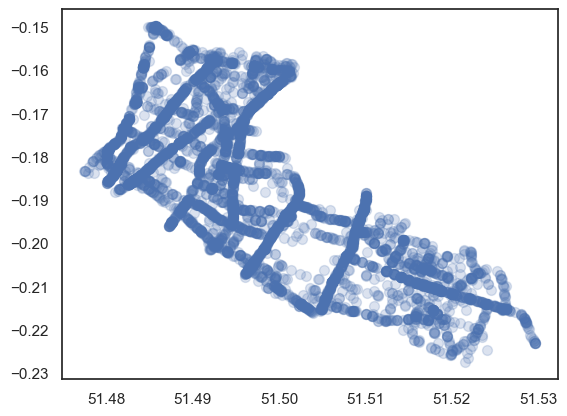

In [19]:
X = np.array(KnC_locs[["Latitude", "Longitude"]], dtype="float64")
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [20]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Create a dataframe from your data
KnC = KnC_locs

# Initialize a map centered around the first data point
map_center = [KnC['Latitude'].iloc[0], KnC['Longitude'].iloc[0]]
m = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster layer for the clustered points
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point with cluster labels
for _, row in KnC.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], icon=None).add_to(marker_cluster)

# Save the map to an HTML file
m.save('map.html')

### Cluster with DBSCAN

In [21]:
# from sklearn.cluster import DBSCAN
# import numpy as np
# import matplotlib.pyplot as plt

In [22]:
# # Extract latitude and longitude columns from the DataFrame
# lat_lon_data = KnC_locs[['Latitude', 'Longitude']].values

In [23]:
# # Convert latitude and longitude to radians
# lat_lon_data = np.radians(lat_lon_data)

In [24]:
# # Define epsilon (maximum distance for data points to be considered neighbors)
# epsilon = 0.000009  # You should adjust this value based on your data

# # Define the minimum number of samples in a neighborhood to form a cluster
# min_samples = 40  # You should adjust this value based on your data

In [25]:
# # Apply DBSCAN
# dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
# labels = dbscan.fit_predict(lat_lon_data)

In [26]:
# # Plot clusters
# plt.figure(figsize=(10,8))

# unique_labels = np.unique(labels)
# for label in unique_labels:
#     cluster = lat_lon_data[labels == label]
#     plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {label}')


# plt.xlabel('Latitude (radians)')
# plt.ylabel('Longitude (radians)')
# legend = plt.legend(fontsize=6)
# plt.show()


In [27]:
# # Check cluster labels
# print(labels)

### Cluster with K-Means

In [28]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
import random

In [29]:
# Load your data into a pandas dataframe
data1 = KnC_locs
# Extract the latitude and longitude columns
X = data1[['Latitude', 'Longitude']]

In [30]:
# Specify the number of clusters (k)
k = 40  # You can adjust this based on your requirements

In [31]:
# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=40, random_state=42)

In [32]:
# Add the cluster labels to your dataframe
data1['Cluster'] = kmeans.labels_

C:\Users\kdrer\AppData\Local\Temp\ipykernel_9656\3956996385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = kmeans.labels_


In [33]:
# Initialize a map centered around the first data point
map_center = [data1['Latitude'].iloc[0], data1['Longitude'].iloc[0]]
m = folium.Map(location=map_center, zoom_start=12)

# Create points with different random colors for each cluster
cluster_colors = {}
for _, row in data1.iterrows():
    cluster_label = row['Cluster']
    if cluster_label not in cluster_colors:
        cluster_colors[cluster_label] = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color = cluster_colors[cluster_label]
    folium.Circle(location=[row['Latitude'], row['Longitude']], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6, popup=f"Cluster {cluster_label}").add_to(m)

# Save the map to an HTML file
m.save('kmeans_clustered_map.html')